In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("data/Train.csv")
test= pd.read_csv("data/Test.csv")

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [5]:
len(train)

8523

In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Check for uniqueness of data

In [7]:
type(train)

pandas.core.frame.DataFrame

In [8]:
unique_ids =pd.unique(train.Item_Identifier)

In [9]:
len(train)-len(unique_ids)

6964

In [10]:
unique_comb=train.groupby(['Item_Identifier','Outlet_Identifier'])

In [11]:
unique_comb.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [12]:
import seaborn as sns

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

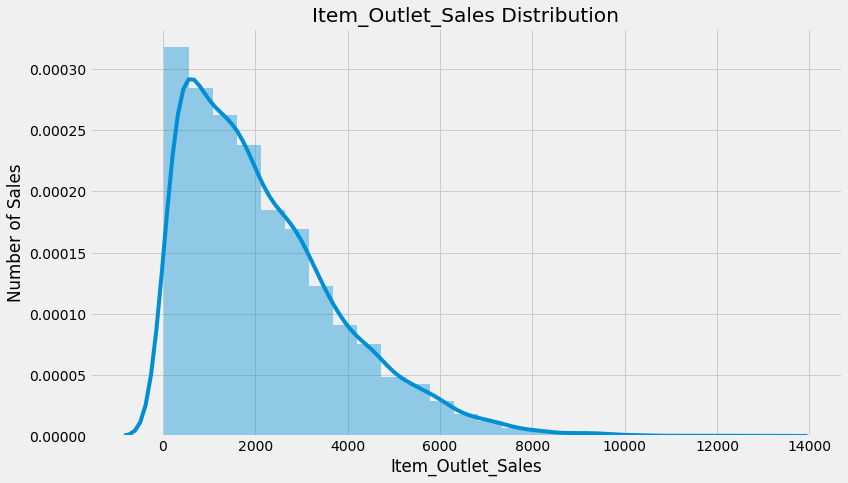

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [14]:
print('skew:', train.Item_Outlet_Sales.skew())
print( 'kurtosis', train.Item_Outlet_Sales.kurt())

skew: 1.1775306028542798
kurtosis 1.6158766814287264


In [15]:
#Numerical features

In [16]:
numeric_features = train.select_dtypes(include=[np.number])

In [17]:
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [18]:
numeric_features.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
#Corelation
corr=numeric_features.corr()

In [20]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [21]:
print(corr['Item_Outlet_Sales'].sort_values())

Item_Visibility             -0.128625
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.014123
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64


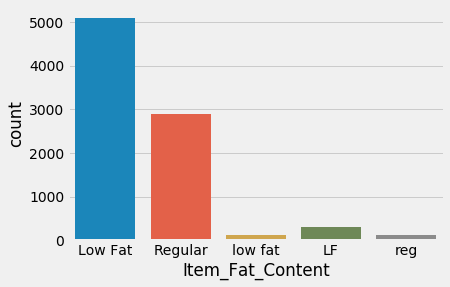

In [22]:
sns.countplot(train.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

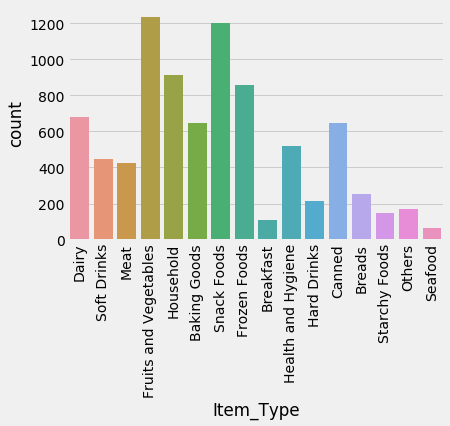

In [23]:
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

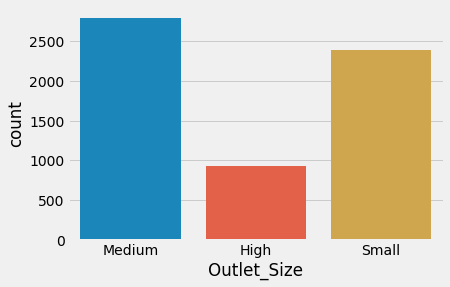

In [24]:
sns.countplot(train.Outlet_Size)

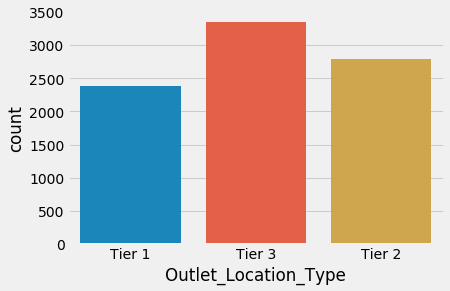

In [25]:
sns.countplot(train.Outlet_Location_Type)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

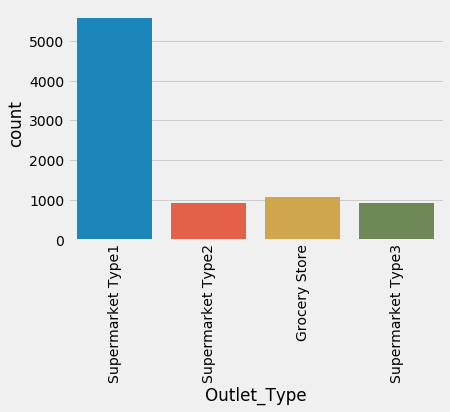

In [26]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

In [27]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [28]:
#Analysis of output sales and visibility

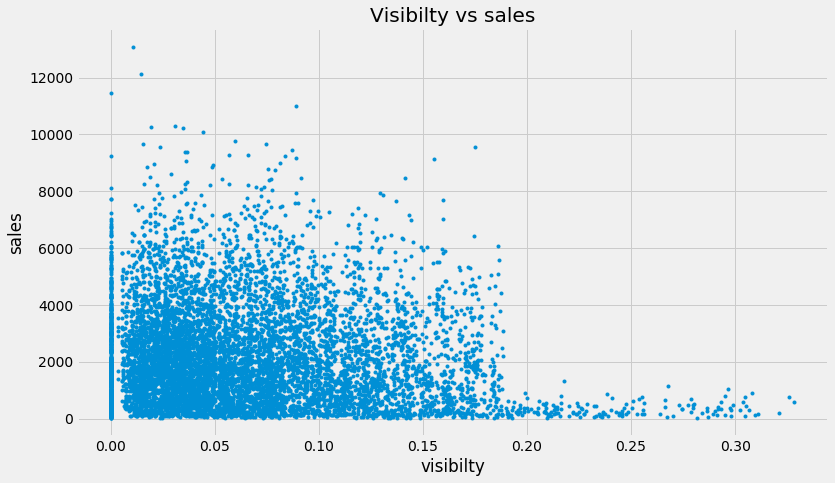

In [29]:
plt.figure(figsize=(12,7))
plt.xlabel('visibilty')
plt.ylabel('sales')
plt.title('Visibilty vs sales')
plt.plot(train.Item_Visibility, train.Item_Outlet_Sales, '.',alpha=3)

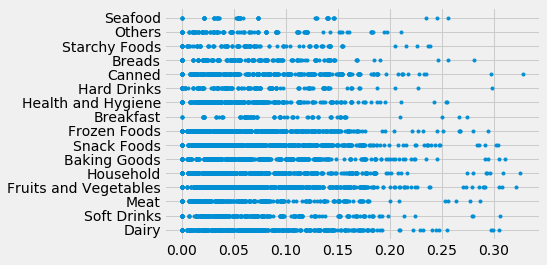

In [30]:
plt.plot(train.Item_Visibility, train.Item_Type, '.',alpha=3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

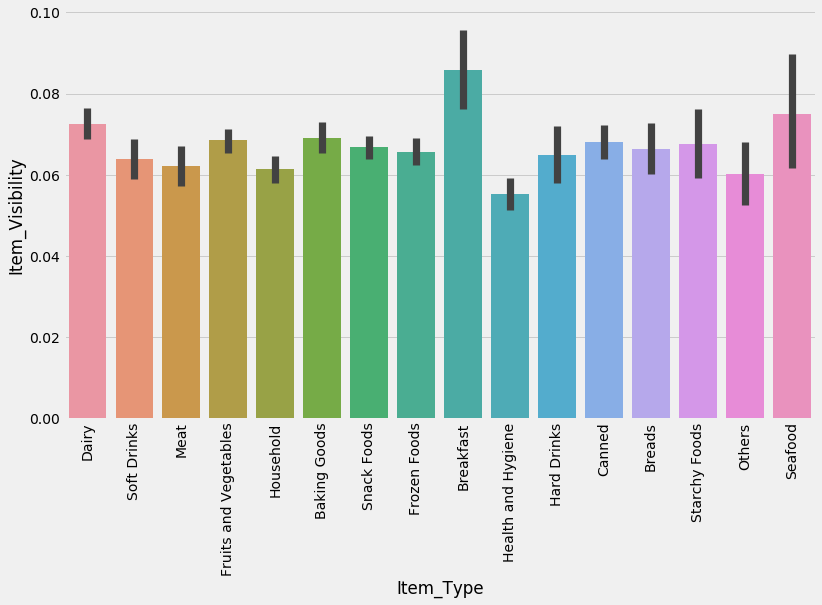

In [31]:
plt.figure(figsize=(12,7))
sns.barplot(train.Item_Type,train.Item_Visibility)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

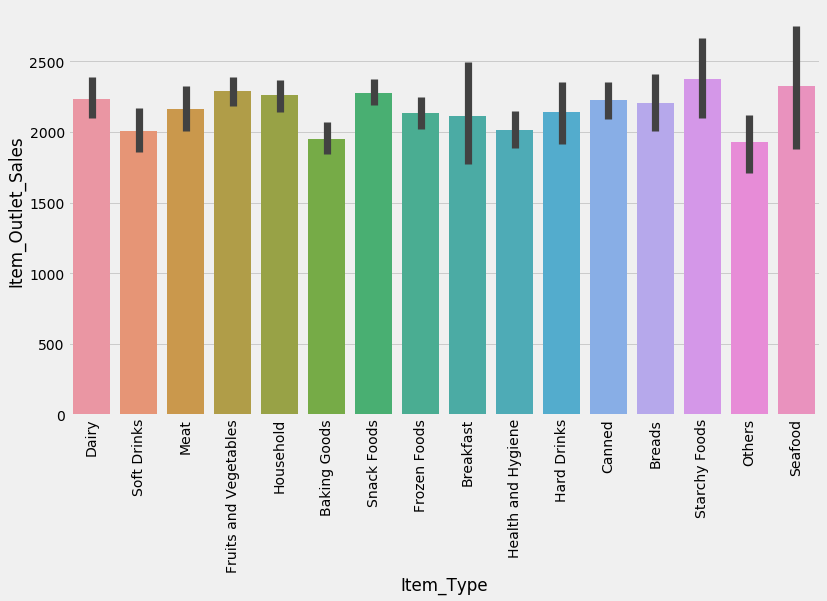

In [32]:
plt.figure(figsize=(12,7))
sns.barplot(train.Item_Type,train.Item_Outlet_Sales)
plt.xticks(rotation=90)

In [33]:
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

                           Item_Outlet_Sales
Outlet_Establishment_Year                   
1985                               1845.5976
1987                               2050.6640
1997                               1945.8005
1998                                250.3408
1999                               1966.1074
2002                               1834.9448
2004                               2109.2544
2007                               2005.0567
2009                               1655.1788


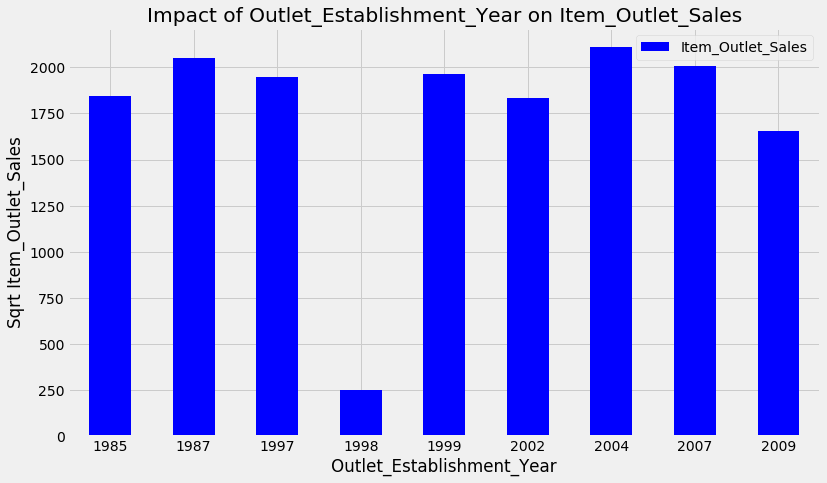

In [34]:
print(Outlet_Establishment_Year_pivot)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()


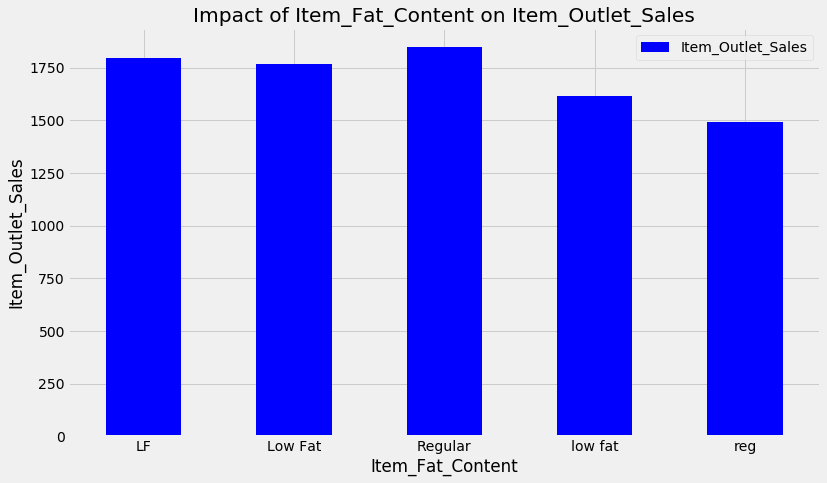

In [35]:
item_fat_pivot = train.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales',aggfunc=np.median)
item_fat_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

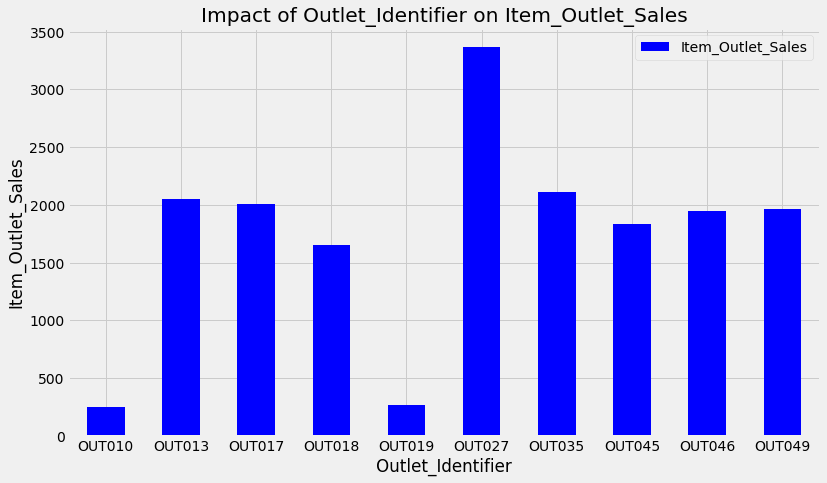

In [36]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color="blue",figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [37]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [38]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


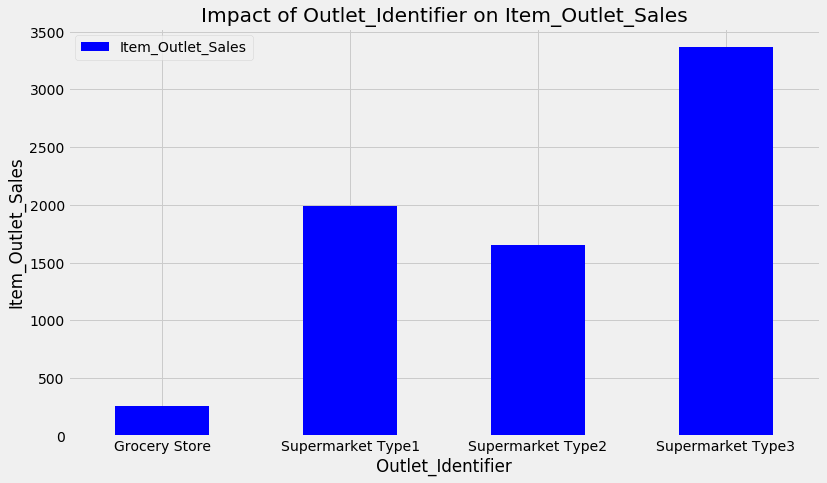

In [39]:
Outlet_type_pivot = train.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_type_pivot.plot(kind='bar', color="blue",figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [40]:
train.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [43]:
# Join Train and Test Dataset
#Create source column to later separate the data easily
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [44]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

In [45]:
#aggfunc is mean by default! Ignores NaN by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
DRB24                  8.785
DRB25                 12.300
DRB48                 16.750
DRC01                  5.920
DRC12                 17.850
DRC13                  8.260
DRC24                 17.850
DRC25                  5.730
DRC27                 13.800
DRC36                 13.000
DRC49                  8.670
DRD01                 12.100
DRD12                  6.960
DRD13                 15.000
DRD15                 10.600
DRD24                 13.850
DRD25                  6.135
DRD27                 18.750
DRD37                  9.800
DRD49                  9.895
DRD60                 15.700
DRE01                 10.100
DRE03                 19.600
DRE12                  4.590
DRE13                  6.280
...                      ...
NCX05                 15.200
NCX06         

In [47]:
def impute_weight(cols):
    Weight = cols[0]
    Identifier = cols[1]
    
    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight
print ('Orignal #missing: %d'%sum(data['Item_Weight'].isnull()))
data['Item_Weight'] = data[['Item_Weight','Item_Identifier']].apply(impute_weight,axis=1).astype(float)
print ('Final #missing: %d'%sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [48]:
#Import mode function:
from scipy.stats import mode
#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=lambda x:x.mode())
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [49]:
def impute_size_mode(cols):
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size
print ('Orignal #missing: %d'%sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size','Outlet_Type']].apply(impute_size_mode,axis=1)
print ('Final #missing: %d'%sum(data['Outlet_Size'].isnull()))

Orignal #missing: 4016
Final #missing: 0


In [50]:
#Visibility is 0 for some- so impute with mean visibility

item_visibility_avg = data.pivot_table(values="Item_Visibility",index='Item_Identifier')

def impute_visibility(cols):
    visibile = cols[0]
    identifier = cols[1]
    if visibile ==0:
        return item_visibility_avg['Item_Visibility'][item_visibility_avg.index==identifier]
    else:
        return visibile
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))   
data['Item_Visibility'] = data[['Item_Visibility','Item_Identifier']].apply(impute_visibility,axis=1).astype(float)
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))
    

Original #zeros: 879
Final #zeros: 0


In [54]:
data['Outlet_Years'] = 2013- data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [56]:
train.pivot_table(values='Item_Type', columns='Item_Identifier',aggfunc=lambda x:x.mode())

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Item_Type,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,Soft Drinks,...,Health and Hygiene,Household,Health and Hygiene,Household,Health and Hygiene,Household,Health and Hygiene,Household,Health and Hygiene,Household


In [62]:
data['Item_Type_Combined'] =data['Item_Identifier'].apply(lambda x: x[0:2])

In [63]:
np.unique(data['Item_Type_Combined'])

array(['DR', 'FD', 'NC'], dtype=object)

In [64]:
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',                                                      'NC':'Non-Consumable',                                                            'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [75]:
np.unique(data['Item_Fat_Content'])

array(['Low Fat', 'Non-Edible', 'Regular'], dtype=object)

In [69]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat',                                                      'reg':'Regular',
'low fat':'Low Fat','reg':'Regular'})

In [74]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content']= "Non-Edible"

In [78]:
item_vis_ratio = lambda x: x['Item_Visibility']/(item_visibility_avg['Item_Visibility'][item_visibility_avg.index==x['Item_Identifier']][0])

In [79]:
data['Item_Visibility_MeanRatio'] = data.apply(item_vis_ratio,axis=1).astype(float)

In [80]:
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
cat_features= ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']

In [88]:
for feature in cat_features:
    data[feature] = le.fit_transform(data[feature])

In [89]:
data


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Years,Item_Type_Combined,Item_Visibility_MeanRatio,Outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,0,1,1,train,14,1,0.931078,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,2,1,2,train,4,0,0.933420,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,0,1,1,train,14,1,0.960069,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.200,1998,OUT010,2,2,0,train,15,1,1.000000,0
4,1,NCD19,53.8614,994.7052,Household,0.009780,8.930,1987,OUT013,2,0,1,train,26,2,1.000000,1
5,2,FDP36,51.4008,556.6088,Baking Goods,0.057059,10.395,2009,OUT018,2,1,2,train,4,1,1.000000,3
6,2,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,2,0,1,train,26,1,1.497197,1
7,0,FDP10,107.7622,4022.7636,Snack Foods,0.127470,19.000,1985,OUT027,2,1,3,train,28,1,0.870493,5
8,2,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,1,2,1,train,11,1,0.924160,7
9,2,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,1,2,1,train,6,1,0.963983,2


In [90]:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [92]:
data.dtypes

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
O

In [93]:
#Drop unwanted cols
data.drop(['Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)


In [96]:
#Divide into test and train:
train = data[data['source'] == 'train']
test = data[data['source'] == 'test']


In [103]:
print (train.shape)
print (test.shape)


(8523, 35)
(5681, 35)


In [104]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/Users/ashabrah/.local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [106]:
#Export files as modified versions:
train.to_csv("data/train_modified.csv",index=False)
test.to_csv("data/test_modified.csv",index=False)

In [107]:
train_df = pd.read_csv("data/train_modified.csv")
test_df = pd.read_csv("data/test_modified.csv")

In [109]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
features = predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])


In [112]:
print (features)

Index(['Item_MRP', 'Item_Visibility', 'Item_Weight', 'Outlet_Years',
       'Item_Visibility_MeanRatio', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1',
       'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7',
       'Outlet_8', 'Outlet_9'],
      dtype='object')


In [125]:
from sklearn.model_selection import  cross_val_score
from sklearn import  metrics
#from sklearn.model_selection import train_test_split

def modelfit(alg, dtrain, dtest, filename):
    alg.fit(dtrain[features], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[features])
    cv_score =cross_val_score(alg,dtrain[features], dtrain[target], cv=20,scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    # Print model report
    print("\nModel Report")
    print("RMSE : %.4g" %np.sqrt(metrics.mean_squared_error(dtrain[target],dtrain_predictions)))
    print("CV score: Mean - %.4g | std  - %.4g| Min - %.4g | Max - %.4g"
         %(np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    #Predicting on test data
    dtest[target]= alg.predict(dtest[features])
    #Export files
    IDcol.append(target)
    submission = pd.DataFrame({x:dtest[x] for x in IDcol})
    submission.to_csv(filename, index= False)
    
    

In [126]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
modelfit(LR, train_df, test_df,'LR.csv')



Model Report
RMSE : 1127
CV score: Mean - 1129 | std  - 43.41| Min - 1075 | Max - 1210


In [128]:
from sklearn.linear_model import Ridge
RidgeRR = Ridge(alpha=0.05,normalize=True)
modelfit(RidgeRR,train_df, test_df,'RR.csv')


Model Report
RMSE : 1129
CV score: Mean - 1130 | std  - 44.6| Min - 1076 | Max - 1217


In [129]:
from sklearn.tree import DecisionTreeRegressor
DT= DecisionTreeRegressor(max_depth =15, min_samples_leaf =100)
modelfit(DT,train_df, test_df,'DT.csv')


Model Report
RMSE : 1058
CV score: Mean - 1091 | std  - 45.42| Min - 1003 | Max - 1186


In [133]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, 'RF.csv')


Model Report
RMSE : 1069
CV score: Mean - 1097 | std  - 43.41| Min - 1028 | Max - 1180


In [ ]:
from xgboost import XGBRegressor
boost_model = XGBRegressor(n_estimators =1000,  learning_rate=0.05)
